In [2]:
%load_ext autoreload
%autoreload 2

# Evaluation results of GPT model on MYC dataset

In [3]:
import os
import sys

# Get the current working directory
notebook_dir = os.getcwd()

# Change the working directory to the root directory of the project
os.chdir("../")

# move up to the parent directory(project root)
sys.path.append(os.path.abspath(os.path.join(notebook_dir, "..")))

os.getcwd()

'c:\\Users\\mhannani\\Documents\\sentiment_analysis'

In [4]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from src.utils.readers import read_df
from src.utils.parsers import parse_toml
from src.utils.counters import count_nans

from src.utils.visualizers import MYCVisualizer
from src.utils.evaluator import MYCEvaluator

In [5]:
# configration filepath
CONFIG_FILE = Path("configs/myc_config.toml")

# read configuration object
config = parse_toml(CONFIG_FILE)

# useful variables
data_root = Path(config['data']['root'])
exernal_data = config['data']['external']
raw_data = config['data']['raw']
interim_data = config['data']['interim']
processed_data = config['data']['processed']
preprocessed_corpus_csv_filename = config['data']['preprocessed_corpus_csv']

# output root
mac_output_root = Path(config['output']['root'])
tsv_corpus_predictions_filename = config['output']['tsv_corpus_predictions']


# constructing the filepath of the corpus
csv_filepath_raw_data = data_root / raw_data / preprocessed_corpus_csv_filename

# constructing the filepath of the results of mac dataset
tsv_gpt_results_myc_filepath = mac_output_root / tsv_corpus_predictions_filename

## Full dataset

In [6]:
df = read_df(tsv_gpt_results_myc_filepath,)

In [7]:
df

,key,tweets,gt_type,pred_type
0,1,انسان عبارة عن دواء للإكتئاب,1.0,1.0
1,2,نحبك يا فنان وااااااحسااااااااان,1.0,1.0
2,3,stream zuin thank you ilyas,1.0,1.0
3,4,وحق الرب الى دوا د الاكتئاب الأسطورة,1.0,1.0
4,5,اسطورة بكل ما تحمل الكلمة من معنى,1.0,1.0
...,...,...,...,...
16099,16102,دخلو وتابوناو معايا برجولة راني ها ولد الشعب و...,1.0,0.0
16100,16103,سينا version 2 ابابا على سلوكية,1.0,0.0
16101,16104,افضل فيديو بتاريخ تضحك تخسر,1.0,1.0
16102,16105,غادي نجاوبك على سؤالك أسي الخراز يمكن معندناش ...,0.0,0.0


In [8]:
gt_type_column_nans_count = count_nans(df, "gt_type")
pred_type_column_nans_count = count_nans(df, "pred_type")

In [9]:
gt_type_column_nans_count, pred_type_column_nans_count

(0, 0)

In [10]:
df.head()

,key,tweets,gt_type,pred_type
0,1,انسان عبارة عن دواء للإكتئاب,1.0,1.0
1,2,نحبك يا فنان وااااااحسااااااااان,1.0,1.0
2,3,stream zuin thank you ilyas,1.0,1.0
3,4,وحق الرب الى دوا د الاكتئاب الأسطورة,1.0,1.0
4,5,اسطورة بكل ما تحمل الكلمة من معنى,1.0,1.0


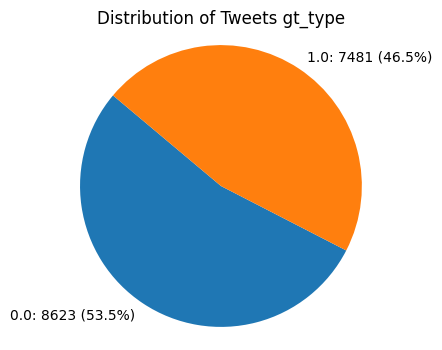

In [11]:
from src.utils.visualizers import visualize_frequencies


visualize_frequencies(df, 'gt_type')

## Evaluation & Visualization

### 1- Across All Dataset with averaging for types(pos., neg., neutral)

In [12]:
evaluator = MYCEvaluator(df, averaging = "macro") 
# we don't have class name of MYC dataset(standard or dialectical)

# visualizor
visualisor = MYCVisualizer(evaluator)

evaluator()

{'accuracy': 0.6246895181321411,
 'precision': 0.6229186267514475,
 'recall': 0.6223057824032099,
 'f1': 0.6225822429816866,
 'conf_matrix': array([[5656, 2962],
        [3073, 4404]], dtype=int64),
 'class_report': '              precision    recall  f1-score   support\n\n           0       0.65      0.66      0.65      8623\n           1       0.60      0.59      0.59      7481\n\n   micro avg       0.63      0.62      0.62     16104\n   macro avg       0.62      0.62      0.62     16104\nweighted avg       0.62      0.62      0.62     16104\n'}

In [13]:
accuracy = visualisor.visualize('accuracy')
precision = visualisor.visualize('precision')
recall = visualisor.visualize('recall')
f1 = visualisor.visualize('f1')

- Accuracy: 0.6246895181321411
- Precision: 0.6229186267514475
- Recall: 0.6223057824032099
- F1: 0.6225822429816866


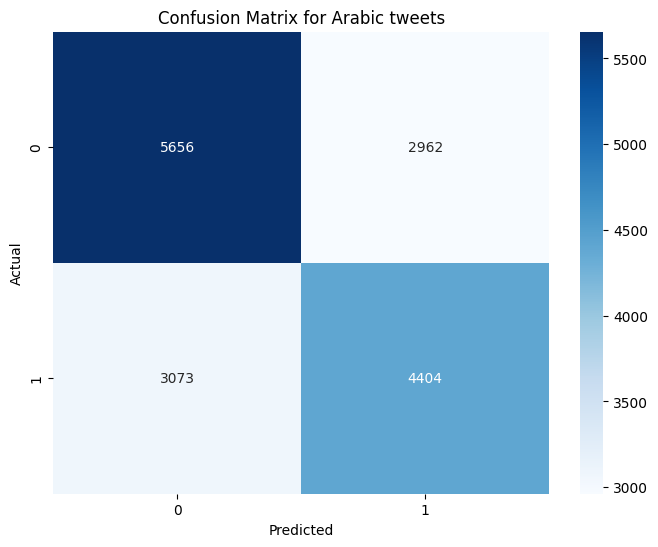

In [16]:
visualisor.show_cfm()